# Statistics Fundamentals

1. Explain the intuition, show the math
2. Show discrete case
3. Show the continuous case

In [5]:
import arviz as az
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

## Stats Fundamental Lesson
In this lesson we want to cover some foundational statistics topics again.

Now we know, you've probably already covered these many times in your life, but we want to revisit them here again. 

1. The intuitive idea
2. The math notation
3. The assumptions
4. Code
5. Some examples

We're doing this to ensure you really understand the concept, and so when you see use it later in this class you know **exactly** what were talking about.

Its our job as instructors to maximize the probability you'll be able to understand and use GPs in practice, so we're not taking any chances here. Given your attention, theres a strong odds you'll do great in this class. So with all those stats puns lets get to it.

## Section: XX Joint Distribution
Whats the probability of two things happening?

So if you have one distribution, if you join it to another distribution. That's a joint distribution. Its like whats the probability youre watching this course and its nightime. 

## The uncoordinated focus group

Your boss wants you to figure out if particular ads are effective at making people want ICs or EVs. So you decide to go run a focus group. You end up with this grid of results

|           | Y = Ad 1 | Y = Ad 2 | Y = Ad 3 |          |
|-----------|----------|:--------:|:--------:|----------|
| X = ICE   | 04 / 30  |  00 / 30 |  10 / 30 |          |
| X = EV    | 03 / 30  |  10 / 30 |  03 / 30 |          |
|           |          |          |          |          |

## Two things are random

1. The group you put people in
2. Whether those folks want an EV or not

## The Notation
Joint distributions are written in math like this

$$
p(X = \text{ICE} \,, Y = \text{Ad 1}) = \frac{4}{30}
$$

We have both parts of the joint distribution. Whether or not they say ICE and whether they saw Ad 1. Not note this is note the probability they said ICE **if** they watched ad one. Just the probability they said ICE and saw ad one.


We can read the two marginals directly off the table:
- $p(Y = \text{Ad 1}) = \frac{7}{30}$
- $p(X = \text{ICE}) = \frac{14}{30}

## No assumnption of independence

We should be clear here. In many basic statistics problems you make an assumption that things are independent to solve the SAT problem. This isn't that. The whole point of running an Ad is to influence someone. 

And in real life the whole point of statistics, is to suss out these relationships between cancer treatements, and outcomes, and being nice to your partner and them not divorcing you. That last example is pretty tough but you know what I mean

## Expanding the joint distribution
What if we included a questionairre, like if the person already owns an EV, or if they're a conservative or liberal, or their age? These are all covariates and can be included in the joint distribution. We may write that joint distribution as such

## Continuous Value Joint Distributions

These are quite common, you may have even heard of this one. Its called a linear regression. The bottom factor is random, but the dependent factor varies as well. Like sampling folks in the real world

## Joint Distributions in PPLs

When writing code in PPLS the bulk of your code is essentialy a joint distribution. Its so common in fact that TFP has an entire API labeled joint distribution

https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/JointDistribution

## Why do we care
Anytime you want to understand how two things vary together, you essentially are looking for a joint distribution. Now this is subtly different than you wanting to know if one thing happened **if** you saw another thing happened, but thats we'll get to that in another section. Lets first talk about marginals

## Section Recap

## Section: YY Marginal Distriibution
When we got two or more things and we only care about the distribution of one thing?

## Your difficult friend

Lets say you're planning a trip with your friend trying to and you as

"Whats the probability you're coming"

But tour friend goes

"Well I can probably come if I get my own bed, but I probably won't come if we go to cancun, but I might if we visit that one restaurant, but not if that one other person is coming?"

And you scream
"STOP, I just need to know probability if you're coming or not"

Congratulations you just asked your friend for the marginal probability they're coming on your trip.

## Its like a piece of paper

Imagine we had a piece of paper, what are the margins? Well its the parts on the edges. In a rough sense that's what marginal distributions are too, at least in 2d. Its like if you took all the dots on a piece of paper and shoved it to the side

## Why do we care?

Well its relevant in two ways
1. Its commonly used in statistics. You'll see this referenced in gaussian processes quite often
2. It's also commonly used in business. What if we had a table that showed the probability of people purchasing across website or instore, but we really just cared about the probability of someone purchasing a product on either? That's a marginal distribution

## Discrete Example



|          | Y = Ad 1 | Y = Ad 2 | Y = Ad 3 | P(X = x) |
|----------|----------|:--------:|:--------:|----------|
| X = ICE  | 04 / 30  |  00 / 30 |  10 / 30 | 14 / 30  |
| X = EV   | 03 / 30  |  10 / 30 |  03 / 30 | 16 / 30  |
| p(Y = y) | 07 / 30  |  10 / 30 |  13 / 30 |          |

## Discrete Math

In textbooks you often see the notation look like this. If its expanded it looks like this

$$
p(X = x) = \sum_{Y} p(Y = y\,, X = x) = p(Y = \text{Ad 1}\,, X = x) + p(Y = \text{Ad 2}\,, X = x) + p(Y = \text{Ad 3}\,, X = x) \,.
$$

But in addition to being statisticians we also  are programmer so often its written like this with the sigma symbol. Sigma typically just means sum

$$
\begin{align}
p(X = \text{ICE}) &= \sum_{Y} p(Y = y\,, X = \text{ICE}) \\
&= p(Y = \text{Ad 1}\,, X = \text{ICE}) + p(Y = \text{Ad 2}\,, X = \text{ICE}) + p(Y = \text{Ad 3}\,, X = \text{ICE}) \\
&= \frac{4}{30} + \frac{0}{30} + \frac{10}{30} = \frac{14}{30}
\end{align}
$$

## Writing this in python

We can write the marginal manually in python from a dataframe. Luckily its also easy to implement in numpy

## You don't need extra information to calculate the marginal
Unlike the joint distribution you don't need any extra information to construct a marginal from a joint distribution. You just basically "undo" the jointness and congrats you've got a marginal.

## Marginal Distributions for continous cases

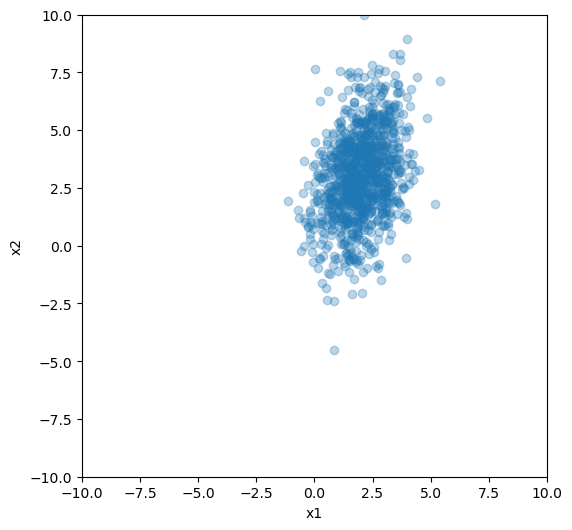

In [16]:
mu = [2.0, 3.0]
sigma1 = 1.0
sigma2 = 4.0
covariance = 0.7
cov = np.array([
    [sigma1, covariance],
    [covariance, sigma2]
])
samples = pm.draw(pm.MvNormal.dist(mu=mu, cov=cov), 1000)

x1 = samples[:, 0]
x2 = samples[:, 1]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(x1, x2, alpha=0.3)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10]);
ax.set_xlabel("x1");
ax.set_ylabel("x2");

This is how x1 varies with x2. But lets say we just care about the density of the plot on one dimension. We just ignore that dimension and make out plot, and this is what the density looks like. Notice how our value of mu is exactly the same.

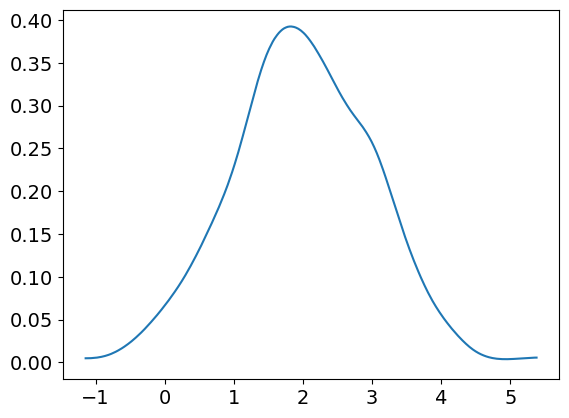

In [17]:
x1 = az.plot_kde(samples[:, 0])

We can even do so for the second axis as well. Notice how concidentally, or maybe not so coincidfentally, the mean is the as our second axes, and also the standard devation is huge! Way bigger than the last one

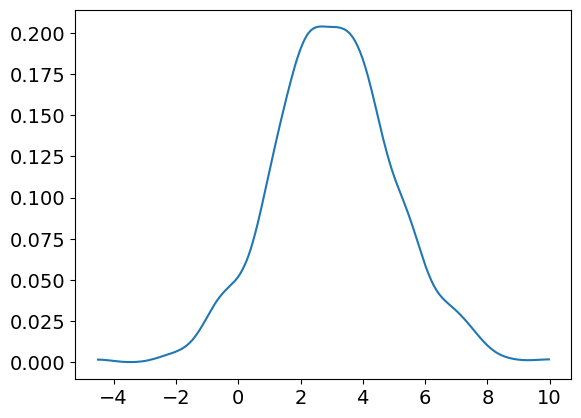

In [18]:
x1 = az.plot_kde(samples[:, 1])

## Image from Wikipedia
This image from wikipedia shows it all in one. Now don't get fooled thinking marginals are always normally distribution. They could be any distribution whatsoever.

![](https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png)

## The math in the continuus case
now often you see the math in the continuous case like this. But don't let it scare you, think back to the ads and ev examples. X, and Y are just the dimensions. And dy just means sum over Y, that is get rid of it.

$$f_X(x) = \int_{c}^{d} f(x,y) \, dy$$

## More than 2 dimensions

This is all well and good for two dimensions, but what if we have 3, 4, 7, 10, or 20 dimensions. Can we still do this? The answer is yes, this is quite common in gaussian processes but also in regression.

## Marginalization in real life
**Revieweres Note**: This example is not well worded but you get the point

Sometimes I have to go to shopping malls on busy days. When I come to park I want to find a spot quickly, that is I want to maximize the chance I find a spot. So what do I do?

Well the parking garage has three dimensions, 2 on each floor, and then height being the third. I know that folks typically park far away from the store so what do I do? Looks through all the spots that are farthest away from the store, independent of height. That in a sense is marginalization. I'm ignoring the probability differences of each floor, and instead collapsing the probability grid, in thsi case 5 floors, into one "2d" heat map

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Hradec_Kr%C3%A1lov%C3%A9%2C_Resslova%2C_parkovac%C3%AD_d%C5%AFm.jpg/1920px-Hradec_Kr%C3%A1lov%C3%A9%2C_Resslova%2C_parkovac%C3%AD_d%C5%AFm.jpg)

## Marginalization in regression
We have this cancer drug that has different efficacy over age, and body weight. We can run a bayesian regression to say this is the probability you'll live. But what happens when someone comes to us and says "I only know the age of this patient, not their weight I need an answer" what do you do? You marginalize out body weight to give them a probablity.

## Section Recap
* Marginalization essentially means take a distribution and smash it flat in one dimnesion
* In the discrete case you take a sum through essentially a for loop
* In the continuous case you have to take a integral, which can get tricky
* If you have samples you can plot the marginal
  * Just know this sampling method while convenient is not sufficient proving things like GPs. Its just a nice hat trick for practioners, especially MCMC practioners
* Marginals are quite common in real life
  * Even if people don't know theyre discussing them